<a href="https://colab.research.google.com/github/yuju1998/A-Search-520/blob/main/Data/Plots-and-Analysis/Voyage_to_the_Unknown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import github2pypi
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#!git clone https://github.com/PietropaoloV/A-Search-520.git

In [3]:
path = ".."
files = os.listdir(path)
files.sort()
del files[0] # remove notebook directory from file listing

# Question 4

In [4]:
q4 = pd.read_csv(path + "/" + files[0])

print(path + "/" + files[0])

../Q4-AStar-Manhattan-NoBumps-Results.csv


<AxesSubplot:xlabel='Probability', ylabel='Solvable %'>

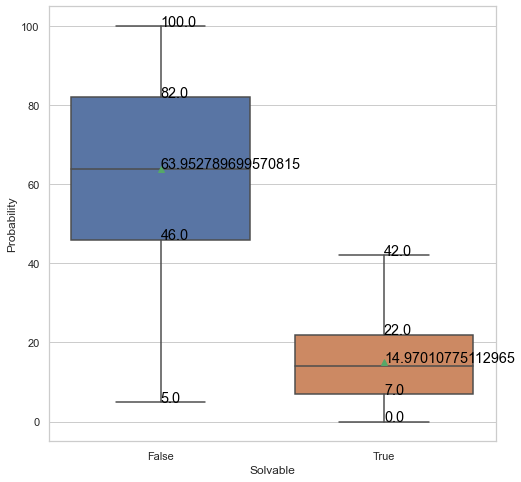

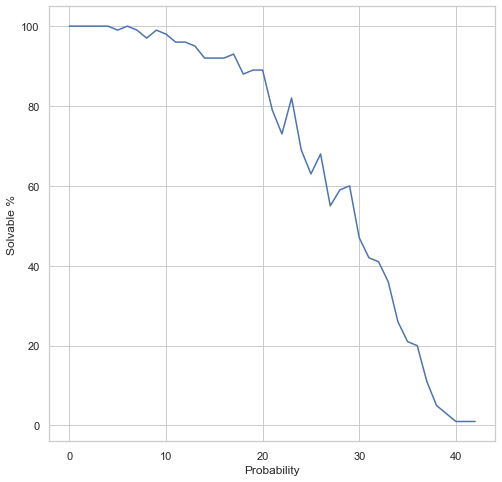

In [5]:
# Plot for Question 4
plt.figure(figsize = (8, 8))
q4_box = sns.boxplot(x=q4['Solvable'], y=q4['Probability'], showmeans=True)
q4_mean = q4.groupby(['Solvable'])['Probability'].mean()
q4_summary = q4.groupby(['Solvable'])['Probability'].quantile([0,0.25,0.5,0.75,1])

#print(q4_mean, q4_summary)

for xtick in q4_box.get_xticks():
   q4_box.text(xtick, q4_summary[xtick][0], str(q4_summary[xtick][0]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.25], str(q4_summary[xtick][0.25]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.75], str(q4_summary[xtick][0.75]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][1], str(q4_summary[xtick][1]), size='large', color='black')
   q4_box.text(xtick, q4_mean[xtick], str(q4_mean[xtick]), size='large', color='black')

# print graph of probability vs solvable %
plt.figure(figsize = (8, 8))
q4[q4["Solvable"]]["Probability"].value_counts().sort_index().plot(xlabel="Probability", ylabel="Solvable %")

# Question 5

In [6]:
q5_c = pd.read_csv(path + "/" + files[1])
q5_e = pd.read_csv(path + "/" + files[2])
q5_m = pd.read_csv(path + "/" + files[3])

print(path + "/" + files[1])
print(path + "/" + files[2])
print(path + "/" + files[3])

q5_c_repeat = pd.read_csv(path + "/" + files[4])
q5_e_repeat = pd.read_csv(path + "/" + files[5])
q5_m_repeat = pd.read_csv(path + "/" + files[6])

print(path + "/" + files[4])
print(path + "/" + files[5])
print(path + "/" + files[6])

../Q5-AStar-Chebyshev-NoBumps-Results.csv
../Q5-AStar-Euclidean-NoBumps-Results.csv
../Q5-AStar-Manhattan-NoBumps-Results.csv
../Q5-RepeatedAStar-Chebyshev-NoBumps-Results.csv
../Q5-RepeatedAStar-Euclidean-NoBumps-Results.csv
../Q5-RepeatedAStar-Manhattan-NoBumps-Results.csv


## Regular A-star

### Number of Cells Processed

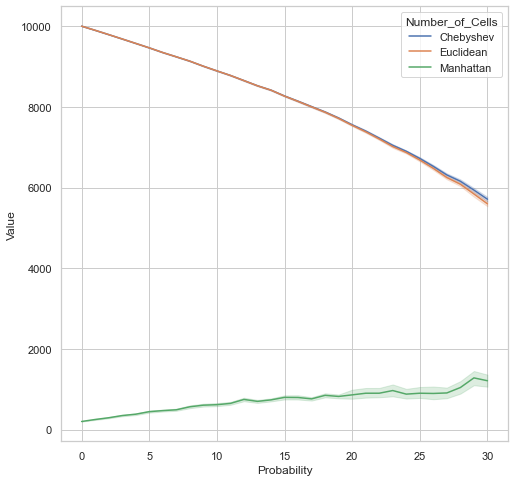

In [7]:
q5_cells = pd.concat([q5_c['Probability'], \
                      q5_c['Number of Cells Processed'].rename('Chebyshev'), \
                      q5_e['Number of Cells Processed'].rename('Euclidean'), \
                      q5_m['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
#print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])

### Runtime

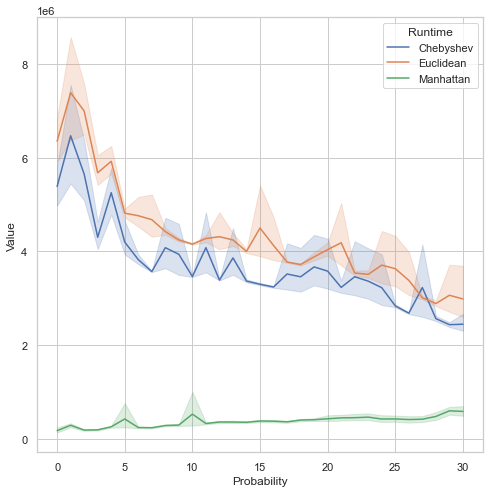

In [8]:
q5_time = pd.concat([q5_c['Probability'], \
                     q5_c['Runtime'].rename('Chebyshev'), \
                     q5_e['Runtime'].rename('Euclidean'), \
                     q5_m['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
#print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])

## Repeated A-star

### Path length

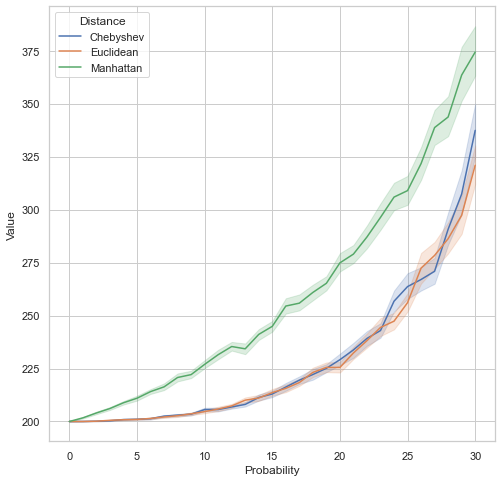

In [9]:
q5_astar = pd.concat([q5_c_repeat['Probability'], \
                      q5_c_repeat['Path Length (Repeated A*'].rename('Chebyshev'), \
                      q5_e_repeat['Path Length (Repeated A*'].rename('Euclidean'), \
                      q5_m_repeat['Path Length (Repeated A*'].rename('Manhattan')], axis=1)
q5_astar = q5_astar.melt('Probability', var_name='Distance', value_name='Value')
#print(q5_astar)
plt.figure(figsize=(8, 8))
q5_astar_line = sns.lineplot(x=q5_astar['Probability'], y=q5_astar['Value'], hue=q5_astar['Distance'])

### Number of Cells Processed

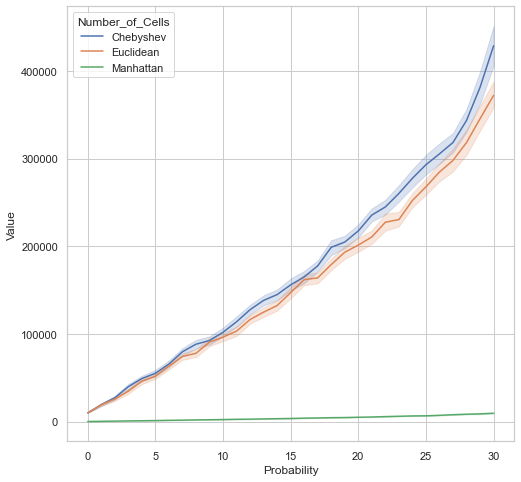

In [10]:
q5_cells = pd.concat([q5_c_repeat['Probability'], \
                      q5_c_repeat['Number of Cells Processed'].rename('Chebyshev'), \
                      q5_e_repeat['Number of Cells Processed'].rename('Euclidean'), \
                      q5_m_repeat['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
#print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])

### Runtime

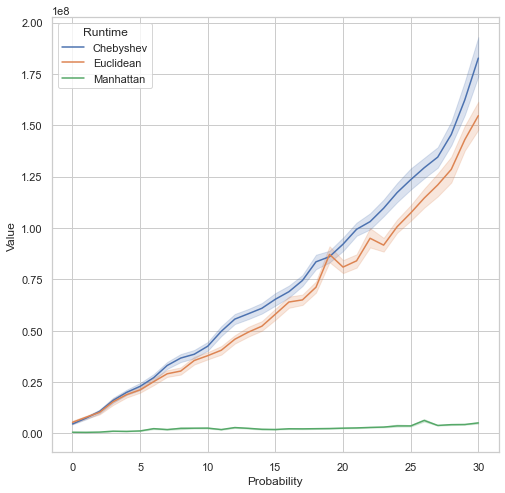

In [11]:
q5_time = pd.concat([q5_c_repeat['Probability'], \
                     q5_c_repeat['Runtime'].rename('Chebyshev'), \
                     q5_e_repeat['Runtime'].rename('Euclidean'), \
                     q5_m_repeat['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
#print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])

# Question 6

In [16]:
q6 = pd.read_csv(path + "/" + files[9])

print(path + "/" + files[9])

q6_dt = pd.concat([q6['Probability'], \
                   q6['Path Length (Repeated A*'].rename('Trajectory'), \
                   q6['Path Length (Discovered)'].rename('Discovered'), \
                   q6['Path Length (Complete)'].rename('Full'), \
                   q6['Number of Cells Processed'].rename("Number_of_Cells")], axis=1)
q6_dt["Discovered_Ratio"] = q6_dt["Trajectory"]/q6_dt["Discovered"]
q6_dt["Complete_Ratio"] = q6_dt["Discovered"]/q6_dt["Full"]

../Q6-AStar-Manhattan-NoBumps-Results.csv


### Density vs Average Trajectory Length

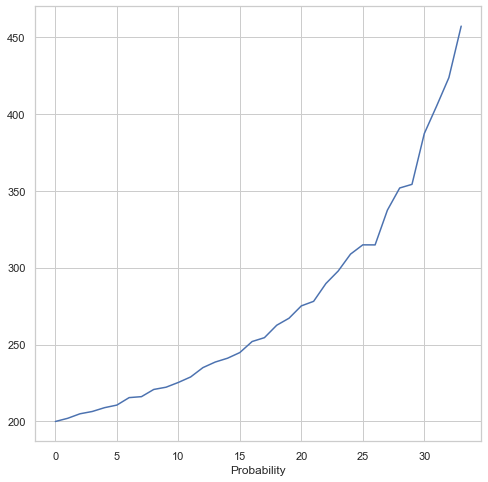

In [17]:
q6_1_mean = q6_dt.groupby(['Probability'])['Trajectory'].mean()
plt.figure(figsize=(8, 8))
q6_1_line = sns.lineplot(data=q6_1_mean, x='Probability', y=q6_1_mean.values)

### Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)

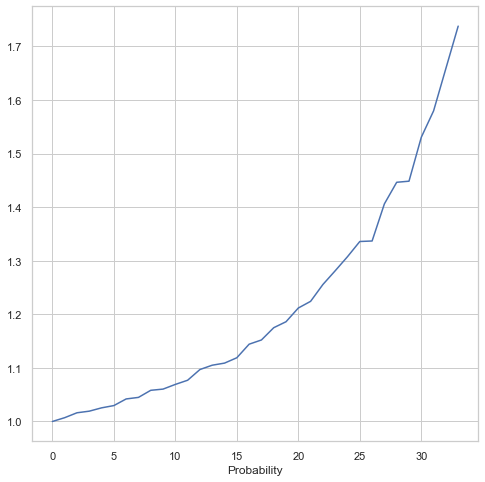

In [18]:
q6_2_mean = q6_dt.groupby(['Probability'])['Discovered_Ratio'].mean()
plt.figure(figsize=(8, 8))
q6_2_line = sns.lineplot(data=q6_1_mean, x='Probability', y=q6_2_mean.values)

### Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)

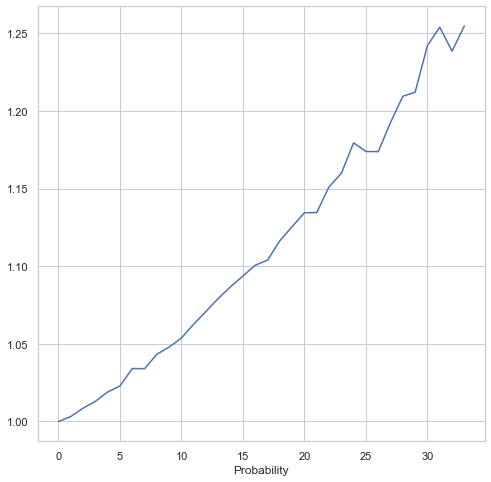

In [34]:
q6_3_mean = q6_dt.groupby(['Probability'])['Complete_Ratio'].mean()
plt.figure(figsize=(8, 8))
q6_3_line = sns.lineplot(data=q6_1_mean, x='Probability', y=q6_3_mean.values)

### Density vs Average Number of Cells Processed by Repeated A*

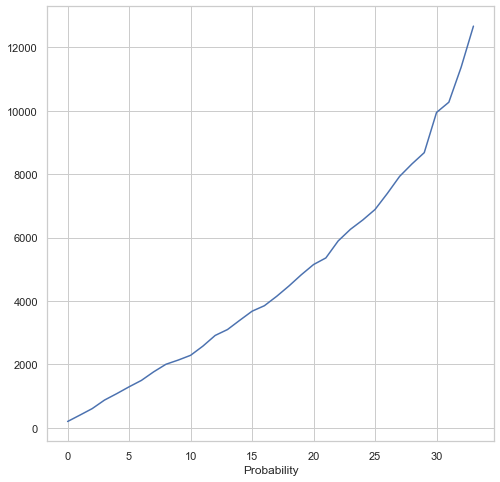

In [20]:
q6_4_mean = q6_dt.groupby(['Probability'])['Number_of_Cells'].mean()
plt.figure(figsize=(8, 8))
q6_4_line = sns.lineplot(data=q6_4_mean, x='Probability', y=q6_4_mean.values)

# Question 7

In [22]:
q7 = pd.read_csv(path + "/" + files[13])

print(path + "/" + files[13])

q7_dt = pd.concat([q7['Probability'], \
                   q7['Path Length (Repeated A*'].rename('Trajectory'), \
                   q7['Path Length (Discovered)'].rename('Discovered'), \
                   q7['Path Length (Complete)'].rename('Full'), \
                   q7['Number of Cells Processed'].rename("Number_of_Cells")], axis=1)
q7_dt["Discovered_Ratio"] = q7_dt["Trajectory"]/q7_dt["Discovered"]
q7_dt["Complete_Ratio"] = q7_dt["Discovered"]/q7_dt["Full"]

../Q7-AStar-Manhattan-Bumps-Results.csv


### Density vs Average Trajectory Length

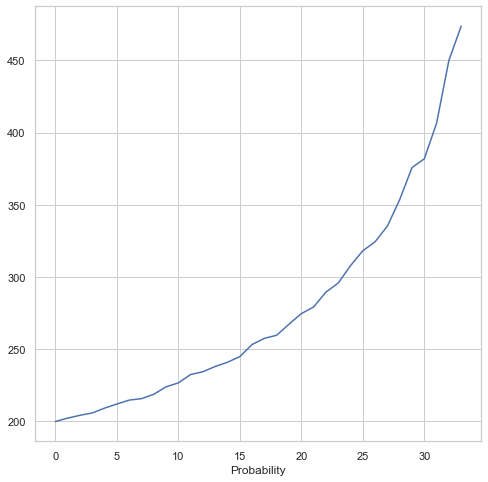

In [23]:
q7_1_mean = q7_dt.groupby(['Probability'])['Trajectory'].mean()
plt.figure(figsize=(8, 8))
q7_1_line = sns.lineplot(data=q7_1_mean, x='Probability', y=q7_1_mean.values)

### Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld)

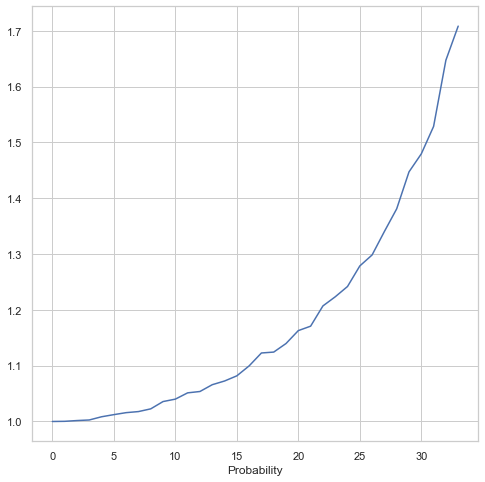

In [24]:
q7_2_mean = q7_dt.groupby(['Probability'])['Discovered_Ratio'].mean()
plt.figure(figsize=(8, 8))
q7_2_line = sns.lineplot(data=q7_1_mean, x='Probability', y=q7_2_mean.values)

### Density vs Average (Length of Shortest Path in Final Discovered Gridworld / Length of ShortestPath in Full Gridworld)

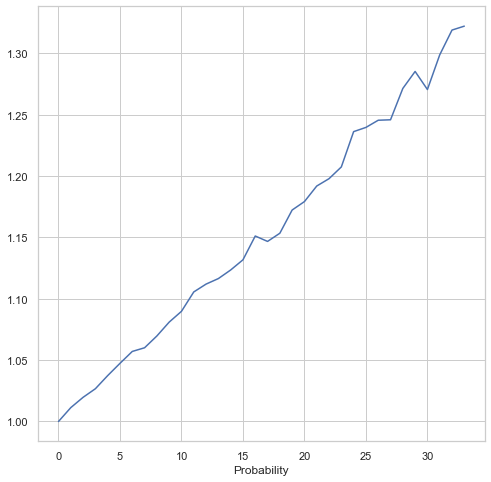

In [35]:
q7_3_mean = q7_dt.groupby(['Probability'])['Complete_Ratio'].mean()
plt.figure(figsize=(8, 8))
q7_3_line = sns.lineplot(data=q7_1_mean, x='Probability', y=q7_3_mean.values)

### Density vs Average Number of Cells Processed by Repeated A*

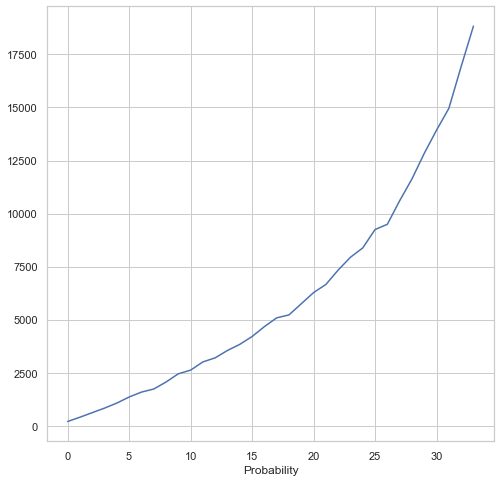

In [26]:
q7_4_mean = q7_dt.groupby(['Probability'])['Number_of_Cells'].mean()
plt.figure(figsize=(8, 8))
q7_4_line = sns.lineplot(data=q7_4_mean, x='Probability', y=q7_4_mean.values)

# Question 8

In [27]:
q8_dt_ls = []
for i in range(15, 25):
    q8_dt_ls.append(pd.read_csv(path + "/" + files[i]))
    print(path + "/" + files[i])

q8_dist = ['1', '11', '16', '21', '26', '31', '36', '41', '46', '51']

for i in range(len(q8_dt_ls)):
    q8_dt_ls[i] = pd.concat([
               q8_dt_ls[i]['Probability'],
               q8_dt_ls[i]['Path Length (Repeated A*'].rename('Trajectory'),
               q8_dt_ls[i]['Runtime'], 
               q8_dt_ls[i]['Number of Cells Processed'].rename("Number_of_Cells")
               ], axis=1)
    q8_dt_ls[i]['Dist'] = q8_dist[i]

../Q8Dist=1-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=11-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=16-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=21-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=26-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=31-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=36-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=41-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=46-AStar-Manhattan-NoBumps-Results.csv
../Q8Dist=51-AStar-Manhattan-NoBumps-Results.csv


In [28]:
q8_trty = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Trajectory'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Trajectory'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Trajectory'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Trajectory'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Trajectory'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Trajectory'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Trajectory'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Trajectory'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Trajectory'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Trajectory'].rename('Distance='+q8_dist[9])
           ], axis=1)
q8_trty = q8_trty.melt('Probability', var_name='Distance', value_name='Trajectory')
#print(q8_trty.head())

### Trajectory

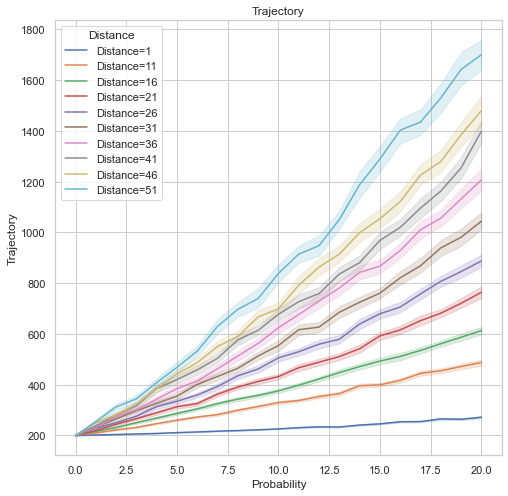

In [29]:
plt.figure(figsize=(8, 8))
plt.title("Trajectory")
q8_trty_line = sns.lineplot(x=q8_trty['Probability'], y=q8_trty['Trajectory'], hue=q8_trty['Distance'])

In [30]:
q8_rntm = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Runtime'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Runtime'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Runtime'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Runtime'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Runtime'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Runtime'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Runtime'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Runtime'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Runtime'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Runtime'].rename('Distance='+q8_dist[9])
           ], axis=1)
q8_rntm = q8_rntm.melt('Probability', var_name='Distance', value_name='Runtime')
#print(q8_rntm.head())

### Runtime

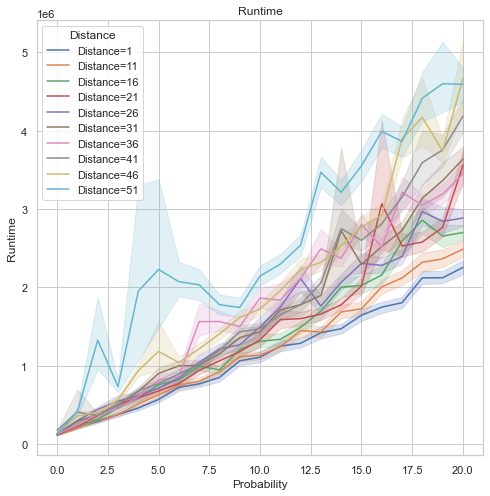

In [31]:
plt.figure(figsize=(8, 8))
plt.title("Runtime")
q8_rntm_line = sns.lineplot(x=q8_rntm['Probability'], y=q8_rntm['Runtime'], hue=q8_rntm['Distance'])


In [32]:
q8_cells = pd.concat([
           q8_dt_ls[0]['Probability'], 
           q8_dt_ls[0]['Number_of_Cells'].rename('Distance='+q8_dist[0]), 
           q8_dt_ls[1]['Number_of_Cells'].rename('Distance='+q8_dist[1]), 
           q8_dt_ls[2]['Number_of_Cells'].rename('Distance='+q8_dist[2]), 
           q8_dt_ls[3]['Number_of_Cells'].rename('Distance='+q8_dist[3]), 
           q8_dt_ls[4]['Number_of_Cells'].rename('Distance='+q8_dist[4]), 
           q8_dt_ls[5]['Number_of_Cells'].rename('Distance='+q8_dist[5]), 
           q8_dt_ls[6]['Number_of_Cells'].rename('Distance='+q8_dist[6]), 
           q8_dt_ls[7]['Number_of_Cells'].rename('Distance='+q8_dist[7]), 
           q8_dt_ls[8]['Number_of_Cells'].rename('Distance='+q8_dist[8]), 
           q8_dt_ls[9]['Number_of_Cells'].rename('Distance='+q8_dist[9])
           ], axis=1)
q8_cells = q8_cells.melt('Probability', var_name='Distance', value_name='Number_of_Cells')
print(q8_cells.head())

   Probability    Distance  Number_of_Cells
0          0.0  Distance=1              201
1          0.0  Distance=1              201
2          0.0  Distance=1              201
3          0.0  Distance=1              201
4          0.0  Distance=1              201


### Number of Cells Processed

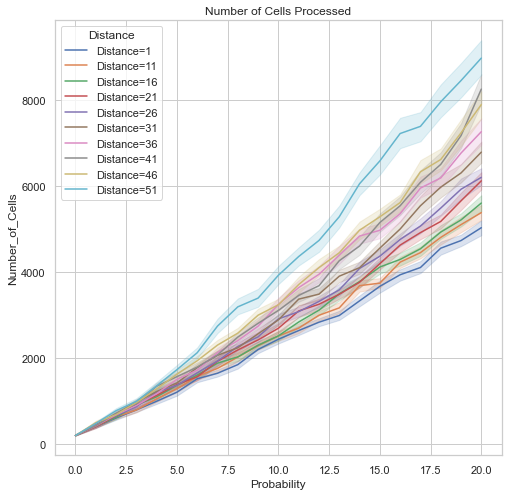

In [33]:
plt.figure(figsize=(8, 8))
plt.title("Number of Cells Processed")
q8_cells_line = sns.lineplot(x=q8_cells['Probability'], y=q8_cells['Number_of_Cells'], hue=q8_cells['Distance'])
